In [ ]:
#Basic functioning of CNN
import numpy as np
def convolution2D(input_image, kernel):
    input_height, input_width = input_image.shape
    kernel_height, kernel_width = kernel.shape
    output_height = (input_height - kernel_height) + 1
    output_width = (input_width - kernel_width) + 1
    output_image = np.zeros((output_height, output_width)) #Initialize Output Image
    for i in range(output_height): #Performing Convolution
        for j in range(output_width):
            output_image[i, j] = np.sum(input_image[i:i+kernel_height, j:j+kernel_width] * kernel)
    return output_image

def max_pooling2D(input_image, pool_size):
    input_height, input_width = input_image.shape
    pool_height, pool_width = pool_size
    output_height = input_height // pool_width
    output_width = input_width // pool_width
    output_image=np.zeros((output_height,output_width)) #Initialize Output Image
    for i in range(output_height): #Performing MaxPooling
        for j in range(output_width):
            output_image[i,j]=np.max(input_image[i*pool_height:(i+1)*pool_height,j*pool_width:(j+1)*pool_width])
    return output_image

#Sample Input image
input_image=np.array([[1,2,1,0],
                     [0,1,3,2],
                     [2,0,1,2],
                     [1,2,2,1]])
#Sample kernel
kernel=np.array([[1,0,-1],
                [1,0,-1],
                [1,0,-1]])
#Sample max pooling size
pool_size=(2,2)
#Perform Convolution
conv_output=convolution2D(input_image,kernel)
#Perform Max pooling
pool_output=max_pooling2D(conv_output,pool_size)
#Output
print("Convolution Output: ",conv_output)
print("Max Pooling Output: ",pool_output)

Convolution Output:  [[-2. -1.]
 [-3. -2.]]
Max Pooling Output:  [[-1.]]


In [ ]:
#CNN Implementation using Keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
#Load and preprocess MNIST Dataset
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images=train_images.reshape((60000,28,28,1)).astype('float32')/255
test_images=test_images.reshape((10000,28,28,1)).astype('float32')/255


train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Build CNN Model
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
#Compile the model
#Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Training the model
model.fit(train_images,train_labels,epochs=5,batch_size=64,validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 26s 33ms/step - loss: 0.2303 - accuracy: 0.9332 - val_loss: 0.0955 - val_accuracy: 0.9741
Epoch 2/5
750/750 [==============================] - 22s 30ms/step - loss: 0.0721 - accuracy: 0.9787 - val_loss: 0.0687 - val_accuracy: 0.9812
Epoch 3/5
750/750 [==============================] - 24s 32ms/step - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.0610 - val_accuracy: 0.9833
Epoch 4/5
750/750 [==============================] - 23s 31ms/step - loss: 0.0360 - accuracy: 0.9893 - val_loss: 0.0547 - val_accuracy: 0.9826
Epoch 5/5
750/750 [==============================] - 23s 31ms/step - loss: 0.0266 - accuracy: 0.9918 - val_loss: 0.0525 - val_accuracy: 0.9847


313/313 [==============================] - 2s 6ms/step - loss: 0.0413 - accuracy: 0.9873
Test Accuracy:  0.9872999787330627
1/1 [==============================] - 0s 97ms/step


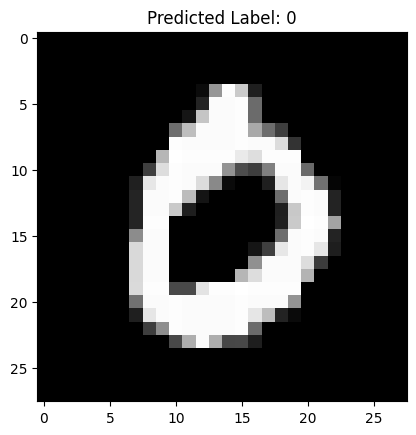

In [ ]:
#Evaluate model on test data
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("Test Accuracy: ",test_acc)

#Prediction on a single test Image
sample_image=test_images[3].reshape((1,28,28,1))
prediction=model.predict(sample_image)
predicted_label=np.argmax(prediction)

#Display the sample image and its predicted label
plt.imshow(test_images[3].reshape((28,28)),cmap='blue')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()